5
Implement and analyze the gradient descent update rule. The gradient descent rule is, forl=1,..., L layers. Assume number of nodes in each layer are 2 and number of nodes in input layer are 4.

To implement and analyze the gradient descent update rule using PyTorch, we'll create a simple neural network with the specified architecture: 4 input nodes, 2 nodes in the hidden layer, and 2 nodes in the output layer. We'll use a simple dataset, the Iris dataset, but limit the number of samples to 100 for faster computation. We'll manually implement the gradient descent update rule in addition to using PyTorch's autograd for differentiation.

Explanation
Data Preparation:

The Iris dataset is loaded, standardized, and limited to 100 samples for simplicity.
The dataset is split into training and testing sets.
Model Definition:

A simple neural network is defined with 4 input nodes, 2 nodes in one hidden layer, and 2 output nodes.
Gradient Descent Update Rule:

The train_and_evaluate_gradient_descent function implements the gradient descent update rule manually. The gradients are computed using loss.backward(), and the parameters are updated with the learning rate using param.data -= learning_rate * param.grad.
Training and Evaluation:

The model is trained for 30 epochs, and both training and test accuracies are recorded.
Visualization:

The accuracies are plotted to show the model's performance over time.
Analysis
In this implementation, the gradient descent update rule is manually applied. This approach provides a deeper understanding of how gradient descent works in optimizing the model's parameters. The learning rate significantly impacts the convergence rate and final accuracy, and careful tuning is necessary for optimal results.

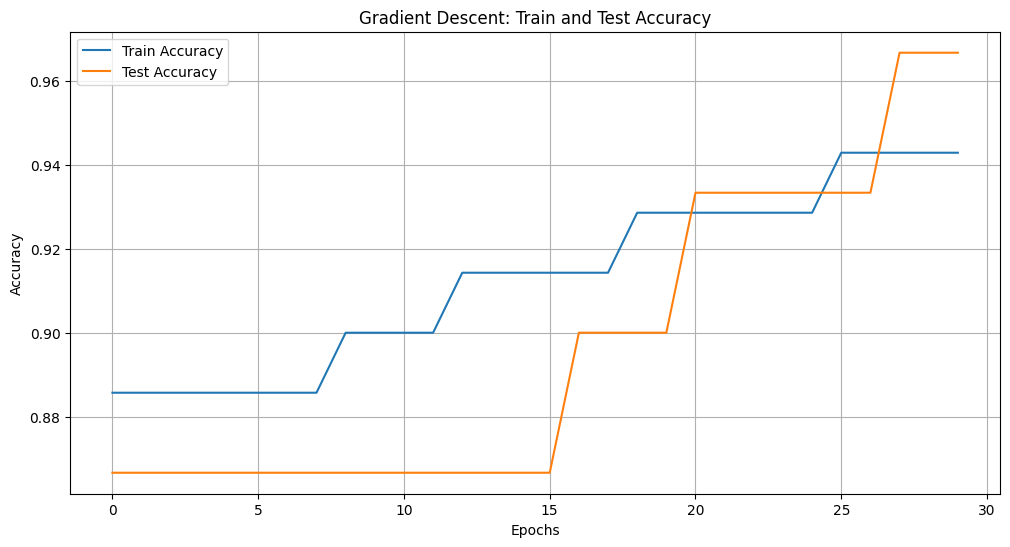

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:100], iris.target[:100]  # Limit to 100 samples for simplicity

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

# Define a simple neural network model with 1 hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(4, 2)
        self.layer2 = nn.Linear(2, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Function to train and evaluate the model using gradient descent
def train_and_evaluate_gradient_descent(learning_rate):
    model = SimpleNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_accuracies = []
    test_accuracies = []

    n_epochs = 30
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in [(X_train, y_train)]:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # Gradient descent update rule
            for param in model.parameters():
                param.data -= learning_rate * param.grad

        # Evaluate on the training set
        model.eval()
        train_correct = 0
        with torch.no_grad():
            outputs = model(X_train)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == y_train).sum().item()
        train_acc = train_correct / len(y_train)
        train_accuracies.append(train_acc)

        # Evaluate on the test set
        test_correct = 0
        with torch.no_grad():
            outputs = model(X_test)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == y_test).sum().item()
        test_acc = test_correct / len(y_test)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

# Set learning rate
learning_rate = 0.01

# Train and evaluate using gradient descent
train_acc, test_acc = train_and_evaluate_gradient_descent(learning_rate)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(range(30), train_acc, label='Train Accuracy')
plt.plot(range(30), test_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Gradient Descent: Train and Test Accuracy')
plt.legend()
plt.grid(True)

plt.show()
